In [56]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Importing the required libraries needed for data analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <font color = blue> IMDb Movie Assignment </font>

The data for 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online is present in this dataset. In this snippet, I have tried to find some interesting insights into these movies and their voters, using Python.

##  1. Reading the data

Reading the movies data file provided and storing it in a dataframe `movies`.

In [58]:
# Read the csv file using 'read_csv'.
movies=pd.read_csv('Movie+Assignment+Data.csv')
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


- ### Inspecting the Dataframe

Inspecting the dataframe for dimensions, null-values, and summary of different numeric columns.

In [59]:
# Checking the number of rows and columns in the dataframe
movies.shape

(100, 62)

In [60]:
# Checking the column-wise info of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [61]:
#Checking for null values
pd.set_option('display.max_rows', None)
movies.isnull().sum()

Title                      0
title_year                 0
budget                     0
Gross                      0
actor_1_name               0
actor_2_name               0
actor_3_name               0
actor_1_facebook_likes     0
actor_2_facebook_likes     1
actor_3_facebook_likes     2
IMDb_rating                0
genre_1                    0
genre_2                    3
genre_3                   26
MetaCritic                 5
Runtime                    0
CVotes10                   0
CVotes09                   0
CVotes08                   0
CVotes07                   0
CVotes06                   0
CVotes05                   0
CVotes04                   0
CVotes03                   0
CVotes02                   0
CVotes01                   0
CVotesMale                 0
CVotesFemale               0
CVotesU18                  0
CVotesU18M                 0
CVotesU18F                 0
CVotes1829                 0
CVotes1829M                0
CVotes1829F                0
CVotes3044    

In [62]:
# Checking the summary for the numeric columns 
movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,92404.170000,125762.230000,76715.280000,27841.450000,10171.750000,4330.110000,2477.070000,1711.570000,4084.350000,2.714462e+05,64468.860000,1769.050000,1318.950000,435.660000,165863.770000,128473.140000,35739.710000,124561.100000,103437.920000,19371.540000,24170.160000,19653.260000,4093.530000,624.370000,54096.740000,188245.680000,7.852000,7.910000,8.205000,8.174000,8.215000,8.005000,8.005000,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,75666.918775,62162.752481,32586.358624,12883.912563,5480.914204,2713.608902,1768.167506,1318.631164,3489.778403,1.676580e+05,39117.954828,1324.522818,1040.959361,366.499996,103522.932356,83188.725257,23092.041366,72089.245359,61116.374727,11324.680698,12841.696513,10669.041306,2187.955655,133.244262,32115.288162,106902.256347,0.263036,0.298312,0.305959,0.358059,0.381484,0.271686,0.281904,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,7321.000000,11668.000000,8558.000000,3370.000000,1162.000000,456.000000,227.000000,158.000000,293.000000,2.244100e+04,9552.000000,121.000000,95.000000,20.000000,15959.000000,10150.000000,4370.000000,12174.000000,9280.000000,2682.000000,1899.000000,1496.000000,355.000000,198.000000,3678.000000,19009.000000,7.400000,7.300000,7.500000,7.400000,7.200000,7.600000,7.600000,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,47098.250000,83207.500000,54934.500000,17834.500000,6026.000000,2293.500000,1172.750000,761.750000,1532.750000,1.719362e+05,35188.750000,756.250000,579.000000,159.750000,109797.750000,77537.750000,17637.750000,78866.250000,64930.250000,12030.500000,15288.750000,12154.750000,2492.750000,545.000000,33328.750000,121863.500000,7.675000,7.700000,8.000000,7.900000,7.975000,7.800000,7.800000,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,71376.000000,117405.500000,76862.000000,27072.000000,9123.000000,3801.000000,1950.000000,1320.000000,2933.000000,2.381995e+05,58539.500000,1420.000000,998.000000,325.500000,139321.500000,111362.000000,32639.500000,111317.500000,94010.500000,17763.000000,21869.500000,17782.000000,3771.500000,639.500000,48560.000000,169132.000000,7.800000,7.900000,8

## Data Analysis

Now that the dataset is loaded and inspected it, it's seen that most of the data is in place. As of now, no data cleaning is required. 

-  ### Reducing the Digits

These numbers in the `budget` and `gross` are too big, compromising its readability. Converting the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [63]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
movies['Gross']=movies['Gross']/1000000
movies['budget']=movies['budget']/1000000
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [64]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    float64
 3   Gross                   100 non-null    float64
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

-  ###  Let's Talk Profit!

    1. Creating a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [65]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column
movies['Profit']=movies['Gross']-movies['budget']
movies.head()
#movies.info()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371


In [66]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'
movies.sort_values(by='Profit',ascending=False,inplace=True)
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,Adventure,Fantasy,81.0,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,Action,Sci-Fi,NaN,69.0,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,Action,Adventure,Comedy,65.0,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,7.6,Action,Adventure,Mystery,76.0,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,Animation,Adventure,Comedy,92.0,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497


In [67]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)
top10=movies.iloc[0:10,:]
top10

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,Adventure,Fantasy,81.0,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,Action,Sci-Fi,NaN,69.0,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,Action,Adventure,Comedy,65.0,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,7.6,Action,Adventure,Mystery,76.0,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,Animation,Adventure,Comedy,92.0,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,8.4,Action,Thriller,NaN,78.0,164,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,7.8,Animation,Action,Adventure,83.0,100,41269,50795,83773,55181,21793,8596,3680,2053,1466,2918,180122,37351,1887,1464,414,111043,89180,20677,77271,65191,11020,13346,11079,2032,579,42963,114308,7.8,7.7,8.2,8.2,7.9,7.9,8.0,7.7,7.6,7.6,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
41,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,7.7,Animation,Adventure,Comedy,72.0,124,56474,66298,136943,102534,35207,11448,4000,1862,1024,1825,251408,9154

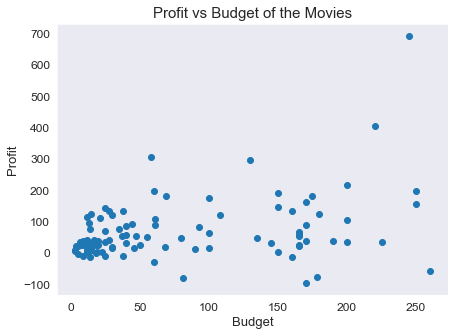

In [68]:
#Plot profit vs budget
plt.figure(figsize=[7,5])
plt.scatter(x=movies['budget'],y=movies['Profit'])
plt.title('Profit vs Budget of the Movies', fontsize=15)
plt.xlabel('Budget',fontsize=13)
plt.ylabel('Profit',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#sns.jointplot(x=movies['budget'],y=movies['Profit'],kind='reg')#
#plt.show()

#### Inferences from the above scatter plot:
There is no strict pattern that we can infer here. Less budget as well as even few high budget movies have incurred loss. But we can maybe infer that, as the budget increases, the chances of higher profit is more.

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. 
Lets have a closer look at this by finding the movies with negative profit.

In [69]:
#Find the movies with negative profit
neg_profit = movies[movies['Profit']<0]
neg_profit

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
99,Tucker and Dale vs Evil,2010,5.0,0.223838,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,7.6,Comedy,Horror,NaN,65.0,124,16572,19818,44460,35863,13456,4588,1684,855,479,848,106144,15113,219,198,20,52889,45169,7232,56379,49634,6156,8861,7645,1072,540,26213,73918,7.5,7.7,7.7,7.7,8.2,7.6,7.6,7.6,7.5,7.5,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-4.776162
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,7.9,Drama,Romance,NaN,94.0,127,11093,15944,22942,14187,5945,2585,1188,710,534,995,49808,16719,121,95,24,28593,20107,8167,28691,21990,6269,7425,5803,1490,391,7959,46138,7.8,7.9,8.6,8.7,8.5,8.0,8.0,7.9,7.7,7.7,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,8.1,Action,Biography,Drama,75.0,123,53667,90907,119603,57343,14948,4436,1625,803,633,1532,246354,35289,888,769,115,138327,119048,17987,105712,92487,11717,20105,17096,2660,593,30738,168519,8.1,8.0,8.3,8.3,8.0,8.3,8.3,8.2,8.0,8.0,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,8.2,Action,Drama,Sport,71.0,140,74983,96953,106673,52972,16668,5727,2353,1205,1050,2479,270734,31075,673,583,84,153824,136536,16000,117636,105144,11019,15201,12960,1990,586,45342,176397,8.2,8.2,8.5,8.5,8.7,8.4,8.4,8.4,8.0,8.0,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,7.7,Comedy,Drama,Romance,NaN,124,11354,11050,20808,14372,5412,1848,664,321,230,402,33714,22540,320,108,207,32475,16916,15217,18576,12982,5338,3399,2616,721,275,7362,36050,7.6,7.9,8.0,7.6,8.3,7.9,7.8,8.0,7.5,7.5,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,7.8,Action,Adventure,Sci-Fi,65.0,132,64428,96219,200144,129352,41945,12861,4799,2349,1448,3182,382107,80444,2075,1612,443,223309,176821,44428,185909,157332,26094,30217,25051,4691,780,87542,257681,7.7,7.9,8.0,7.9,8.3,7.9,7.9,8.0,7.7,7.6,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594629
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,7.5,Action,Comedy,Romance,69.0,112,47292,48976,79198,59689,28452,13451,6977,4254,3069,6287,208417,45718,1022,791,221,129202,99363,28557,102986,88456,13334,14195,12157,1778,677,56559,150511,7.5,7.4,8.1,8.2,8.0,7.6,7.7,7.5,7.4,7.4,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,7.8,Animation,Adventure,Comedy,71.0,124,56575,54688,97207,70947,26805,8530,3043,1396,805,1606,166088,97213,1950,1048,885,144744,81897,61390,89588,63534,24912,15318,11277,3805,622,47643,148024,7.6,8.2,7.8,7.4,8.3,7.9,7.7,8.2,7.6,7.5,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,7.9,Action,Adventure,Sci-Fi,71.0,113,60383,99596,175961,100724,28982,8145,2858,1368,857,1661,341199,45790,1893,1584,292,172016,148814,21495,157476,138752,16463,30965,26562,3820,691,55486,217557,7.9,7.8,8.2,8.1,8.2,8.0,8.0,7.8,7.8,7.8,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The

- ### The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

1. Firstly convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, I have to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [70]:
# Change the scale of MetaCritic
movies['MetaCritic']=movies['MetaCritic']/10
movies.MetaCritic

97     8.1
11     6.9
47     6.5
32     7.6
12     9.2
8      7.8
45     8.3
1      7.8
41     7.2
18     9.4
34     9.6
19     7.6
9      7.5
98     6.5
63     6.2
55     8.0
61     7.2
27     7.4
76     8.8
16     NaN
0      9.3
33     8.0
85     6.9
68     8.1
43     7.9
13     8.1
83     7.9
51     8.6
20     7.0
44     6.3
52     NaN
37     6.8
81     7.3
58     8.2
64     7.9
6      7.2
35     8.1
23     7.4
53     9.5
57     7.4
3      8.1
24     7.4
48     8.3
31     7.6
40     6.3
62     8.1
74     8.1
2      6.9
15     7.2
4      9.6
21     7.9
69     9.6
65     8.8
92     6.8
14     7.4
10     6.6
54     8.1
30     7.6
77     8.9
75     8.4
91     7.2
86     7.7
49     8.7
70     9.3
25     7.2
72     8.8
90     7.6
26     7.4
93     8.4
94    10.0
78     7.2
79     7.8
59     6.6
42     6.4
60     8.2
36     7.5
5      8.8
50     7.4
38     7.1
80     7.8
95     8.8
87     8.6
96     9.4
84     6.7
29     9.0
88     NaN
67     9.0
71     NaN
73     8.2
99     6.5
89     9.4

In [71]:
pd.set_option('display.max_columns', None)
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,Adventure,Fantasy,8.1,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,Action,Sci-Fi,NaN,6.9,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,Action,Adventure,Comedy,6.5,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,7.6,Action,Adventure,Mystery,7.6,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,Animation,Adventure,Comedy,9.2,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497


In [72]:
# Find the average ratings
movies['Avg_rating']=(movies['MetaCritic']+movies['IMDb_rating'])/2
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Avg_rating
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,Adventure,Fantasy,8.1,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,Action,Sci-Fi,NaN,6.9,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547,7.50
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,Action,Adventure,Comedy,6.5,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,7.6,Action,Adventure,Mystery,7.6,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577,7.60
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,Animation,Adventure,Comedy,9.2,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,8.75


In [73]:
#Sort in descending order of average rating
movies.sort_values(by='Avg_rating',ascending=False,inplace=True)

In [74]:
#Retain only the movies in which the absolute difference between the `IMDb_rating` and `Metacritic` columns is less than 0.5
UniversalAcclaim = movies[abs(movies['IMDb_rating']-movies['MetaCritic'])<0.5]

In [75]:
#retain only the movies with a rating equal to higher than 8 and store these movies in a new dataframe UniversalAcclaim.
UniversalAcclaim = UniversalAcclaim[UniversalAcclaim['Avg_rating']>8]
UniversalAcclaim

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Avg_rating
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,8.5,Drama,Music,NaN,8.8,107,110404,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,8.4,Drama,Western,NaN,8.1,165,234824,339329,286911,121445,38251,14227,6469,4149,3181,8065,695211,139226,3250,2726,501,410538,332690,74006,301231,253253,43774,57463,47535,8962,816,123423,448126,8.4,8.4,8.8,8.9,8.5,8.6,8.6,8.5,8.3,8.3,8.3,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25
93,Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,8.0,Biography,Drama,NaN,8.4,117,37544,82276,145488,66156,16777,4582,1721,870,654,1588,231258,63266,864,650,205,145018,110493,32974,110555,88233,20687,22093,16963,4743,598,42222,173002,7.9,8.1,8.2,8.2,8.1,8.1,8.1,8.1,7.8,7.8,8.0,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.296514,8.20
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,Adventure,Fantasy,8.1,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,8.1,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05


- ### Find the Most Popular Trios - I

The dataframe has three columns viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. My objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Finding out the top 5 popular trios, and output their names in a list.


In [76]:
movies['FB_likes']=movies['actor_1_facebook_likes']+movies['actor_2_facebook_likes']+movies['actor_3_facebook_likes']
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Avg_rating,FB_likes
94,Boyhood,2014,4.0,25.359200,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,7.9,Drama,NaN,NaN,10.0,165,49673,62055,76838,52238,23789,10431,4906,3071,2248,5086,183807,51558,1393,995,381,123006,92639,29076,81594,65261,15118,17881,13995,3567,559,36433,134679,8.0,7.7,8.1,8.1,8.0,8.1,8.1,7.8,7.8,7.8,7.6,7.7,7.7,7.7,7.2,8.0,7.9,R,USA,21.359200,8.95,550.0
69,12 Years a Slave,2013,20.0,56.667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,8.1,Biography,Drama,History,9.6,134,75556,126223,161460,83070,27231,9603,4021,2420,1785,4739,313823,82012,1837,1363,457,200910,153669,45301,138762,112943,23895,29252,23072,5726,664,53328,224519,8.1,8.1,8.4,8.4,8.5,8.2,8.2,8.2,8.0,7.9,8.0,7.8,7.8,8.1,7.7,8.3,8.0,R,USA,36.667870,8.85,3160.0
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,8.2,Animation,Adventure,Comedy,9.4,95,87509,113244,119801,67153,24210,8542,3349,1872,1123,3450,244433,79081,3361,2294,1040,170056,121574,46685,108560,86312,20516,18694,14910,3416,587,48297,176446,8.2,8.2,8.4,8.4,8.3,8.3,8.3,8.3,8.1,8.1,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367,8.80,2151.0
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,Animation,Adventure,Comedy,9.2,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,8.75,16721.0
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,9.6,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75,74818.0


In [77]:
movies.sort_values(by='FB_likes', ascending=False, inplace=True)

In [78]:
movies.head().loc[:,'actor_1_name':'actor_3_name'].values.tolist()

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

In [79]:
pop_trios=movies.head().loc[:,'actor_1_name':'actor_3_facebook_likes']
pop_trios

,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
2,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0
27,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0
14,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0
4,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0
8,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0


- ### Find the Most Popular Trios - II

In the previous cells, I found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.


In [80]:
def check_pop(a,b,c):
    ans=''
    if (a>(b/2)) and (a>(c/2)):
        ans+='T'
    else:
        ans+='F'
    if (b>(a/2)) and (b>(c/2)):
        ans+='T'
    else:
        ans+='F'
    if (c>(b/2)) and (c>(a/2)):
        ans+='T'
    else:
        ans+='F'
    
    return ans

pop_trios['Check_Pop']=pop_trios.apply(lambda x: check_pop(x.actor_1_facebook_likes, x.actor_2_facebook_likes, x.actor_3_facebook_likes), axis=1)

In [81]:
pop_trios.sort_values(by='Check_Pop', ascending=False)

,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Check_Pop
27,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,TTT
14,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,TTT
8,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,TTT
2,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,FTF
4,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,FTF


In [82]:
pop_trios[pop_trios['Check_Pop']=='TTT']

,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Check_Pop
27,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,TTT
14,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,TTT
8,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,TTT




**`3 Trios satisfy the above condition among the 5 popular trios
'Leonardo DiCaprio	Tom Hardy	Joseph Gordon-Levitt' is the most popular Trio after applying the condition`**

- ### Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. 

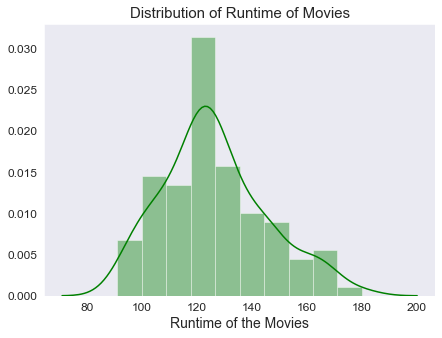

In [83]:
# Runtime histogram/density plot
sns.set_style("dark")
plt.figure(figsize=[7,5])
sns.distplot(movies['Runtime'], bins=10, color="g")
plt.xlabel('Runtime of the Movies',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of Runtime of Movies", fontsize=15)
plt.show()

- ### R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, let's find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [84]:
PopularR = movies[movies['content_rating']=='R'].sort_values(by='CVotesU18', ascending=False).head(10)
PopularR

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Avg_rating,FB_likes
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,Action,Adventure,Comedy,6.5,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25,17166.0
36,The Wolf of Wall Street,2013,100.0,116.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,8.2,Biography,Comedy,Crime,7.5,180,171660,236650,250667,129164,46715,18682,8674,5854,4258,9689,559564,123698,3622,2842,757,360841,286627,70874,227096,189110,34712,39996,32676,6629,730,89006,366829,8.2,7.8,8.6,8.7,8.0,8.4,8.5,7.9,8.0,8.1,7.7,7.6,7.6,7.5,7.8,8.1,8.1,R,USA,16.866727,7.85,44000.0
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,8.4,Drama,Western,NaN,8.1,165,234824,339329,286911,121445,38251,14227,6469,4149,3181,8065,695211,139226,3250,2726,501,410538,332690,74006,301231,253253,43774,57463,47535,8962,816,123423,448126,8.4,8.4,8.8,8.9,8.5,8.6,8.6,8.5,8.3,8.3,8.3,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25,40265.0
29,Mad Max: Fury Road,2015,150.0,153.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,8.1,Action,Adventure,Sci-Fi,9.0,120,136194,158403,163494,97218,42636,19505,9932,6743,4930,10516,424435,69670,3159,2682,456,238202,198026,37751,183637,159520,21373,34848,29980,4209,726,73080,267084,8.1,7.9,8.5,8.6,8.4,8.3,8.3,8.1,8.0,8.0,7.8,7.5,7.5,7.2,8.0,8.2,8.0,R,Australia,3.629485,8.55,36943.0
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,8.5,Drama,Music,NaN,8.8,107,110404,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65,25505.0
31,The Revenant,2015,135.0,183.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,8.0,Adventure,Drama,Thriller,7.6,156,79977,121229,158019,91154,33492,12837,5571,3386,2320,4570,323938,61051,2619,2141,458,186003,152198,31926,138923,118140,18699,28582,23782,4269,624,51493,213741,8.0,7.9,8.5,8.5,8.2,8.1,8.2,7.9,7.9,7.9,7.7,7.8,7.8,7.8,7.6,8.1,7.9,R,USA,48.635922,7.80,56733.0
40,Shutter Island,2010,80.0,127.968405,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,8.1,Mystery,Thriller,NaN,6.3,138,150405,230844,278844,132349,45167,15615,7061,3780,2662,4703,570554,136360,2321,1811,494,364786,283316,78332,263273,217923,42222,43235,35277,7256,840,108244,419648,8.1,8.2,8.6,8.6,8.8,8.4,8.4,8.4,7.9,7.9,8.0,7.5,7.4,7.6,7.6,7.8,8.1,R,USA,47.968405,7.20,29386.0
43,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,8.1,Crime,Drama,Mystery,7.9,149,89539,177373,218018,103600,32989,11691,5285,3262,2247,5500,397571,113606,2286,1598,665,260425,193602,64291,179552,144771,32133,34696,27226,6840,689,70667,280587,8.1,8.1,8.5,8.6,8.4,8.3,8.3,8.2,7.9,8.0,7.9,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00,2272.0
65,The Grand Budapest Hotel,2014,25.0,59.073773,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,1000.0,670.0,8.1,Adventure,Comedy,Drama,8.8,99,84258,142011,168705,88086,31

## Demographic analysis

The last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8,I made use one of these columns - CVotesU18). Also, there are three genre columns indicating the genres of a particular movie. I will analyse the voters across all demographics and also see how these vary across various genres. 

In [85]:
# Create the dataframe df_by_genre
df_by_genre = pd.concat([movies.loc[:,'genre_1':'genre_3'],movies.loc[:,'CVotes10':'VotesnUS']],axis=1)

In [86]:
df_by_genre.reset_index(drop=True, inplace=True)
df_by_genre

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
0,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0
1,Action,Adventure,Sci-Fi,584839,485218,304457,130972,46393,20595,10050,6631,5243,15365,1044318,239796,5678,4462,1184,655187,512411,136770,472680,392845,73555,79634,65508,12795,885,212524,707266,8.8,8.7,9.1,9.1,9.0,9.0,9.0,8.8,8.7,8.7,8.5,8.1,8.1,8.0,8.2,8.7,8.8
2,Action,Adventure,Sci-Fi,91765,127521,183578,104658,33027,10059,3710,1903,1225,3301,370835,71008,3038,2403,614,220178,179039,39094,158607,135392,20927,26834,22460,3884,710,67889,229049,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.2,7.8,7.8,8.0,7.7,7.7,7.9,7.4,8.1,7.9
3,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8
4,Action,Thriller,NaN,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4
5,Comedy,Drama,Romance,73783,107247,184382,123467,46614,17257,6997,3682,2457,4470,338051,131000,1548,875,660,236404,160001,73922,170543,129880,38160,32839,24722,7550,733,79953,259084,7.8,7.7,8.1,8.1,8.1,7.9,7.9,7.7,7.6,7.7,7.6,7.6,7.6,7.7,6.9,8.0,7.6
6,Action,Sci-Fi,NaN,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9
7,Animation,Adventure,Comedy,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0
8,Biography,Comedy,Drama,22879,48091,94303,58756,18650,6141,2253,1133,713,1415,167875,31804,982,825,147,93777,76925,15725,77242,65202,10813,16496,13532,2658,501,32587,115947,7.8,7.6,7.8,7.8,7.6,7.8,7.9,7.6,7.7,7.7,7.6,7.7,7.7,7.8,7.3,7.9,7.7
9,Adventure,Drama,Thriller,79977,121229,158019,91154,33492,12837,5571,3386,2320,4570,323938,61051,2619,2141,458,186003,152198,31926,138923,118140,18699,28582,23782,4269,624,51493,213741,8.0,7.9,8.5,8.5,8.2,8.1,8.2,7.9,7.9,7.9,7.7,7.8,7.8,7.8,7.6,8.1,7.9


In [87]:
# Create a column cnt and initialize it to 1
df_by_genre['cnt']=1
df_by_genre.head()

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,1
1,Action,Adventure,Sci-Fi,584839,485218,304457,130972,46393,20595,10050,6631,5243,15365,1044318,239796,5678,4462,1184,655187,512411,136770,472680,392845,73555,79634,65508,12795,885,212524,707266,8.8,8.7,9.1,9.1,9.0,9.0,9.0,8.8,8.7,8.7,8.5,8.1,8.1,8.0,8.2,8.7,8.8,1
2,Action,Adventure,Sci-Fi,91765,127521,183578,104658,33027,10059,3710,1903,1225,3301,370835,71008,3038,2403,614,220178,179039,39094,158607,135392,20927,26834,22460,3884,710,67889,229049,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.2,7.8,7.8,8.0,7.7,7.7,7.9,7.4,8.1,7.9,1
3,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,1
4,Action,Thriller,NaN,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,1


In [88]:
# Group the movies by individual genres
df_by_g1=df_by_genre.groupby('genre_1').sum()
df_by_g1

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,2928407,3261919,4247693,2662020,986774,364234,156150,89483,61975,162426,9994618,1858890,67450,53291,13665,5736871,4679868,1001097,4449857,3815204,572731,831269,696252,120596,18788,1964491,6411552,211.8,213.2,221.3,220.8,223.5,215.7,215.6,215.3,209.1,208.8,210.0,206.5,206.0,209.0,197.2,215.8,209.5,27
Adventure,1058779,1179818,1560541,966275,365486,136985,58559,33174,22018,48100,3535070,802902,23513,18128,5195,2153334,1685453,446466,1585917,1323556,239846,325640,266247,53656,8099,659263,2463964,94.1,95.4,98.4,98.0,98.1,96.0,96.2,96.4,92.7,92.6,93.5,92.0,91.6,93.8,88.9,95.3,93.5,12
Animation,681562,798227,1153214,722782,251076,83069,30718,15733,10026,25193,2282985,724844,23835,16354,7307,1588630,1140646,432464,1043387,834069,195268,179365,142636,33699,6364,524406,1654665,86.4,89.3,88.9,87.7,90.7,88.5,87.9,90.2,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11
Biography,666831,1088430,1654704,962977,306247,100005,38874,21536,15365,37469,3151311,790809,17284,12914,4210,1953708,1505949,428103,1449651,1185900,242976,301036,237968,57899,7620,595106,2261929,102.3,102.9,106.7,106.4,106.7,103.9,104.1,103.4,100.8,100.7,101.3,100.5,100.0,102.9,94.7,103.3,101.5,13
Comedy,371217,496905,770395,518566,205434,81933,35788,20965,15286,33241,1573480,527333,8718,5778,2859,1050091,739846,299041,787591,617610,158450,156738,122213,31665,4960,344669,1232105,70.0,70.2,73.3,73.1,73.4,71.5,71.6,70.8,68.6,68.7,68.9,67.7,67.5,68.7,62.7,70.9,69.4,9
Crime,383290,690221,1083469,627593,206756,71460,30336,17190,11757,25839,2143407,441492,8514,6761,1673,1230337,987306,230777,1026490,865073,147390,193931,158846,31602,5565,429386,1508967,70.8,69.8,74.2,74.4,72.5,71.8,72.0,70.2,69.4,69.7,68.8,68.7,68.6,69.6,66.3,71.9,70.1,9
Drama,1080725,1494053,1827363,1078966,417205,163874,75525,45846,32068,71464,3893193,1164256,25270,16858,8163,2508620,1824930,657691,1849944,1484457,338271,385802,305887,72980,10201,784109,2871738,141.7,142.0,149.1,148.4,147.8,144.7,144.7,143.5,139.3,139.0,139.7,137.7,137.2,138.7,130.0,143.2,141.1,18
Mystery,150405,230844,278844,132349,45167,15615,7061,3780,2662,4703,570554,136360,2321,1811,494,364786,283316,78332,263273,217923,42222,43235,35277,7256,840,108244,419648,8.1,8.2,8.6,8.6,8.8,8.4,8.4,8.4,7.9,7.9,8.0,7.5,7.4,7.6,7.6,7.8,8.1,1


In [89]:
df_by_g2=df_by_genre.groupby('genre_2').sum()
df_by_g3=df_by_genre.groupby('genre_3').sum()

In [90]:
# Add the grouped data frames and store it in a new data frame
t =  df_by_g1.add(df_by_g2,fill_value=0)
df_add = t.add(df_by_g3,fill_value=0)
df_add

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,10837034.0,2105410.0,76280.0,59424.0,16302.0,6314227.0,5105793.0,1146894.0,4824318.0,4117926.0,639437.0,894736.0,746866.0,132357.0,21123.0,2144895.0,7005964.0,243.2,245.6,253.8,252.8,256.8,247.8,247.5,248.0,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,11759815.0,2705904.0,95791.0,72215.0,22864.0,7165429.0,5578727.0,1516049.0,5262641.0,4400217.0,788533.0,1012382.0,832607.0,162152.0,25157.0,2345901.0,7905326.0,298.4,304.5,311.4,309.3,314.9,304.9,304.3,307.3,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,2282985.0,724844.0,23835.0,16354.0,7307.0,1588630.0,1140646.0,432464.0,1043387.0,834069.0,195268.0,179365.0,142636.0,33699.0,6364.0,524406.0,1654665.0,86.4,89.3,88.9,87.7,90.7,88.5,87.9,90.2,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,4329471.0,986889.0,20937.0,15962.0,4780.0,2603294.0,2052779.0,524830.0,1999316.0,1658844.0,312373.0,405909.0,324710.0,74280.0,10804.0,817016.0,3078088.0,141.1,141.8,146.9,146.6,146.9,143.4,143.7,142.8,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,5223033.0,1498288.0,37971.0,27099.0,10574.0,3404755.0,2507369.0,862715.0,2453650.0,1985974.0,433363.0,458960.0,367532.0,83303.0,13934.0,1132079.0,3815002.0,180.2,181.2,187.4,186.9,186.9,183.6,183.8,182.8,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,2881292.0,586638.0,12866.0,10253.0,2503.0,1677551.0,1349593.0,311413.0,1338103.0,1129391.0,190218.0,251542.0,206799.0,40242.0,6821.0,549216.0,1994718.0,86.6,84.9,90.6,90.9,87.7,87.9,88.2,85.4,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,14668668.0,3572166.0,80847.0,59481.0,20608.0,8871540.0,6838230.0,1943300.0,6897952.0,5696903.0,1102691.0,1404823.0,1132442.0,247420.0,38086.0,2870687.0,10480222.0,509.8,510.3,533.6,532.2,529.7,519.0,519.7,514.8,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Family,98165.0,95675.0,180381.0,143401.0,59137.0,22971.0,9472.0,5128.0,3317.0,7545.0,403523.0,127301.0,2851.0,1926.0,888.0,284685.0,205116.0,76732.0,187454.0,149201.0,35839.0,40213.0,31740.0,7815.0,1403.0,95266.0,323735.0,15.0,15.8,15.9,15.7,16.2,15.6,15.4,16.0,14.8,14.7,15.5,14.9,14.8,15.6,14.1,15.6,15.0,2.0
Fantasy,572452.0,602223.0,889767.0,599747.0,241831.0,93484.0,39403.0,22233.0,14693.0,38841.0,1963752.0,509053.0,15451.0,11704.0,3631.0,1235849.0,934069.0,289061.0,889082.0,728499.0,147645.0,181407.0,146943.0,31316.0,4609.0,378849.0,1391028.0,54.1,56.0,56.9,56.5,58.3,55.5,55.4,56.5,53.3,53.1,55.0,53.4,52.8,55.5,50.5,54.9,53.7,7.0
History,151261.0,260387.0,394531.0,223062.0,67861.0,21233.0,7964.0,4384.0,3148.0,9291.0,736411.0,163565.0,4640.0,3714.0,879.0,437514.0,347085.0,85999.0,329271.0,274405.0,50114.0,72947.0,58590.0,13092.0,2170.0,134572.0,511592.0,31.7,31.8,32.9,32.9,33.3,32.1,32.1,32.0,31.2,31.1,31.3,31.0,30.7,32.1,29.4,32.2,31.2,4.0


In [91]:
# Extract genres with atleast 10 occurences
genre_top10 = df_add[df_add['cnt']>=10]

In [92]:
# Take the mean for every column by dividing with cnt 
genre_top10.loc[:,'CVotes10':'VotesnUS'] = genre_top10.loc[:,'CVotes10':'VotesnUS'].divide(genre_top10['cnt'],axis=0)
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,349581.741935,67916.451613,2460.645161,1916.903226,525.870968,203684.741935,164703.000000,36996.580645,155623.161290,132836.322581,20627.000000,28862.451613,24092.451613,4269.580645,681.387097,69190.161290,225998.838710,7.845161,7.922581,8.187097,8.154839,8.283871,7.993548,7.983871,8.000000,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,309468.815789,71208.000000,2520.815789,1900.394737,601.684211,188563.921053,146808.605263,39896.026316,138490.552632,115795.184211,20750.868421,26641.631579,21910.710526,4267.157895,662.026316,61734.236842,208034.894737,7.852632,8.013158,8.194737,8.139474,8.286842,8.023684,8.007895,8.086842,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,207544.090909,65894.909091,2166.818182,1486.727273,664.272727,144420.909091,103695.090909,39314.909091,94853.363636,75824.454545,17751.636364,16305.909091,12966.909091,3063.545455,578.545455,47673.272727,150424.090909,7.854545,8.118182,8.081818,7.972727,8.245455,8.045455,7.990909,8.200000,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,240526.166667,54827.166667,1163.166667,886.777778,265.555556,144627.444444,114043.277778,29157.222222,111073.111111,92158.000000,17354.055556,22550.500000,18039.444444,4126.666667,600.222222,45389.777778,171004.888889,7.838889,7.877778,8.161111,8.144444,8.161111,7.966667,7.983333,7.933333,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,227088.391304,65142.956522,1650.913043,1178.217391,459.739130,148032.826087,109016.043478,37509.347826,106680.434783,86346.695652,18841.869565,19954.782609,15979.652174,3621.869565,605.826087,49220.826087,165869.652174,7.834783,7.878261,8.147826,8.126087,8.126087,7.982609,7.991304,7.947826,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,261935.636364,53330.727273,1169.636364,932.090909,227.545455,152504.636364,122690.272727,28310.272727,121645.727273,102671.909091,17292.545455,22867.454545,18799.909091,3658.363636,620.090909,49928.727273,181338.000000,7.872727,7.718182,8.236364,8.263636,7.972727,7.990909,8.018182,7.763636,7.718182,7.763636,7.609091,7.627273,7.618182,7.681818,7.390909,7.981818,7.800000,11.0
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,225671.815385,54956.400000,1243.800000,915.092308,317.046154,136485.230769,105203.538462,29896.923077,106122.338462,87644.661538,16964.476923,21612.661538,17422.184615,3806.461538,585.938462,44164.415385,161234.184615,7.843077,7.850769,8.209231,8.187692,8.149231,7.984615,7.995385,7.920000,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.2230

In [93]:
# Rounding off the columns of Votes to two decimals
genre_top10.loc[:,'VotesM':'VotesnUS']= round(genre_top10.loc[:,'VotesM':'VotesnUS'],ndigits=2)
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,349581.741935,67916.451613,2460.645161,1916.903226,525.870968,203684.741935,164703.000000,36996.580645,155623.161290,132836.322581,20627.000000,28862.451613,24092.451613,4269.580645,681.387097,69190.161290,225998.838710,7.85,7.92,8.19,8.15,8.28,7.99,7.98,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,309468.815789,71208.000000,2520.815789,1900.394737,601.684211,188563.921053,146808.605263,39896.026316,138490.552632,115795.184211,20750.868421,26641.631579,21910.710526,4267.157895,662.026316,61734.236842,208034.894737,7.85,8.01,8.19,8.14,8.29,8.02,8.01,8.09,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,207544.090909,65894.909091,2166.818182,1486.727273,664.272727,144420.909091,103695.090909,39314.909091,94853.363636,75824.454545,17751.636364,16305.909091,12966.909091,3063.545455,578.545455,47673.272727,150424.090909,7.85,8.12,8.08,7.97,8.25,8.05,7.99,8.20,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,240526.166667,54827.166667,1163.166667,886.777778,265.555556,144627.444444,114043.277778,29157.222222,111073.111111,92158.000000,17354.055556,22550.500000,18039.444444,4126.666667,600.222222,45389.777778,171004.888889,7.84,7.88,8.16,8.14,8.16,7.97,7.98,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,227088.391304,65142.956522,1650.913043,1178.217391,459.739130,148032.826087,109016.043478,37509.347826,106680.434783,86346.695652,18841.869565,19954.782609,15979.652174,3621.869565,605.826087,49220.826087,165869.652174,7.83,7.88,8.15,8.13,8.13,7.98,7.99,7.95,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,261935.636364,53330.727273,1169.636364,932.090909,227.545455,152504.636364,122690.272727,28310.272727,121645.727273,102671.909091,17292.545455,22867.454545,18799.909091,3658.363636,620.090909,49928.727273,181338.000000,7.87,7.72,8.24,8.26,7.97,7.99,8.02,7.76,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,225671.815385,54956.400000,1243.800000,915.092308,317.046154,136485.230769,105203.538462,29896.923077,106122.338462,87644.661538,16964.476923,21612.661538,17422.184615,3806.461538,585.938462,44164.415385,161234.184615,7.84,7.85,8.21,8.19,8.15,7.98,8.00,7.92,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,3082.692308,162668.692308,63572.769231,1021.230769,535.307692,474.461538,118201.076923,79024.846154,37926.923077,80768.461538,62253.923077,17350.846154,15719.153846,12054.923077,3381.461538,548.461538,37141.461538,131254.076923,7.75,7.83,8.14,8.06,8.16,7.92,7.92,7.91,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Sci-Fi,1367

In [94]:
# Converting CVotes to int type
genre_top10=pd.concat([genre_top10.loc[:,'CVotes10':'CVotesnUS'].astype(int),genre_top10.loc[:,'VotesM':'cnt']],axis=1)

In [95]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,349581,67916,2460,1916,525,203684,164703,36996,155623,132836,20627,28862,24092,4269,681,69190,225998,7.85,7.92,8.19,8.15,8.28,7.99,7.98,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,309468,71208,2520,1900,601,188563,146808,39896,138490,115795,20750,26641,21910,4267,662,61734,208034,7.85,8.01,8.19,8.14,8.29,8.02,8.01,8.09,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,207544,65894,2166,1486,664,144420,103695,39314,94853,75824,17751,16305,12966,3063,578,47673,150424,7.85,8.12,8.08,7.97,8.25,8.05,7.99,8.20,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,240526,54827,1163,886,265,144627,114043,29157,111073,92158,17354,22550,18039,4126,600,45389,171004,7.84,7.88,8.16,8.14,8.16,7.97,7.98,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,227088,65142,1650,1178,459,148032,109016,37509,106680,86346,18841,19954,15979,3621,605,49220,165869,7.83,7.88,8.15,8.13,8.13,7.98,7.99,7.95,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,261935,53330,1169,932,227,152504,122690,28310,121645,102671,17292,22867,18799,3658,620,49928,181338,7.87,7.72,8.24,8.26,7.97,7.99,8.02,7.76,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,225671,54956,1243,915,317,136485,105203,29896,106122,87644,16964,21612,17422,3806,585,44164,161234,7.84,7.85,8.21,8.19,8.15,7.98,8.00,7.92,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,162668,63572,1021,535,474,118201,79024,37926,80768,62253,17350,15719,12054,3381,548,37141,131254,7.75,7.83,8.14,8.06,8.16,7.92,7.92,7.91,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,422437,83618,3017,2382,613,244808,197123,45269,188483,160141,25620,36127,30141,5340,714,80695,272068,7.96,7.96,8.29,8.29,8.33,8.11,8.11,8.04,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,333785,68749,1664,1327,322,195463,156573,36989,153475,129421,21922,29590,24421,4654,669,63361,228944,7.87,7.82,8.21,8.21,8.07,8.01,8.02,7.88,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0


-  ### Genre Counts!

In [96]:
# Countplot for genres
genre_top10.reset_index(inplace=True)
genre_top10

,index,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,349581,67916,2460,1916,525,203684,164703,36996,155623,132836,20627,28862,24092,4269,681,69190,225998,7.85,7.92,8.19,8.15,8.28,7.99,7.98,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
1,Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,309468,71208,2520,1900,601,188563,146808,39896,138490,115795,20750,26641,21910,4267,662,61734,208034,7.85,8.01,8.19,8.14,8.29,8.02,8.01,8.09,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
2,Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,207544,65894,2166,1486,664,144420,103695,39314,94853,75824,17751,16305,12966,3063,578,47673,150424,7.85,8.12,8.08,7.97,8.25,8.05,7.99,8.20,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
3,Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,240526,54827,1163,886,265,144627,114043,29157,111073,92158,17354,22550,18039,4126,600,45389,171004,7.84,7.88,8.16,8.14,8.16,7.97,7.98,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
4,Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,227088,65142,1650,1178,459,148032,109016,37509,106680,86346,18841,19954,15979,3621,605,49220,165869,7.83,7.88,8.15,8.13,8.13,7.98,7.99,7.95,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
5,Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,261935,53330,1169,932,227,152504,122690,28310,121645,102671,17292,22867,18799,3658,620,49928,181338,7.87,7.72,8.24,8.26,7.97,7.99,8.02,7.76,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
6,Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,225671,54956,1243,915,317,136485,105203,29896,106122,87644,16964,21612,17422,3806,585,44164,161234,7.84,7.85,8.21,8.19,8.15,7.98,8.00,7.92,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
7,Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,162668,63572,1021,535,474,118201,79024,37926,80768,62253,17350,15719,12054,3381,548,37141,131254,7.75,7.83,8.14,8.06,8.16,7.92,7.92,7.91,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
8,Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,422437,83618,3017,2382,613,244808,197123,45269,188483,160141,25620,36127,30141,5340,714,80695,272068,7.96,7.96,8.29,8.29,8.33,8.11,8.11,8.04,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
9,Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,333785,68749,1664,1327,322,195463,156573,36989,153475,129421,21922,29590,24421,4654,669,63361,228944,7.87,7.82,8.21,8.21,8.07,8.01,8.02,7.88,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0


In [97]:
genre_top10.rename(columns={'index':'Genre'},inplace=True)
genre_top10

,Genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,349581,67916,2460,1916,525,203684,164703,36996,155623,132836,20627,28862,24092,4269,681,69190,225998,7.85,7.92,8.19,8.15,8.28,7.99,7.98,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
1,Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,309468,71208,2520,1900,601,188563,146808,39896,138490,115795,20750,26641,21910,4267,662,61734,208034,7.85,8.01,8.19,8.14,8.29,8.02,8.01,8.09,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
2,Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,207544,65894,2166,1486,664,144420,103695,39314,94853,75824,17751,16305,12966,3063,578,47673,150424,7.85,8.12,8.08,7.97,8.25,8.05,7.99,8.20,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
3,Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,240526,54827,1163,886,265,144627,114043,29157,111073,92158,17354,22550,18039,4126,600,45389,171004,7.84,7.88,8.16,8.14,8.16,7.97,7.98,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
4,Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,227088,65142,1650,1178,459,148032,109016,37509,106680,86346,18841,19954,15979,3621,605,49220,165869,7.83,7.88,8.15,8.13,8.13,7.98,7.99,7.95,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
5,Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,261935,53330,1169,932,227,152504,122690,28310,121645,102671,17292,22867,18799,3658,620,49928,181338,7.87,7.72,8.24,8.26,7.97,7.99,8.02,7.76,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
6,Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,225671,54956,1243,915,317,136485,105203,29896,106122,87644,16964,21612,17422,3806,585,44164,161234,7.84,7.85,8.21,8.19,8.15,7.98,8.00,7.92,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
7,Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,162668,63572,1021,535,474,118201,79024,37926,80768,62253,17350,15719,12054,3381,548,37141,131254,7.75,7.83,8.14,8.06,8.16,7.92,7.92,7.91,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
8,Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,422437,83618,3017,2382,613,244808,197123,45269,188483,160141,25620,36127,30141,5340,714,80695,272068,7.96,7.96,8.29,8.29,8.33,8.11,8.11,8.04,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
9,Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,333785,68749,1664,1327,322,195463,156573,36989,153475,129421,21922,29590,24421,4654,669,63361,228944,7.87,7.82,8.21,8.21,8.07,8.01,8.02,7.88,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0


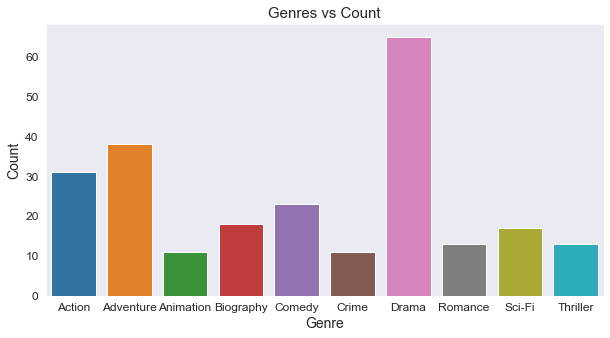

In [98]:
plt.figure(figsize=[10,5])
sns.barplot(genre_top10['Genre'],genre_top10['cnt'])
plt.title('Genres vs Count',fontsize=15)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

-  ###  Gender and Genre

Have a close look at the Votes- and CVotes-related columns, we can see the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

In [99]:
# 1st set of heat maps for CVotes-related columns
tempM=pd.pivot_table(data=genre_top10,index=['Genre'],values=('CVotesU18M','CVotes1829M','CVotes3044M','CVotes45AM'),aggfunc=np.mean)
tempF=pd.pivot_table(data=genre_top10,index=['Genre'],values=('CVotesU18F','CVotes1829F','CVotes3044F','CVotes45AF'),aggfunc=np.mean)

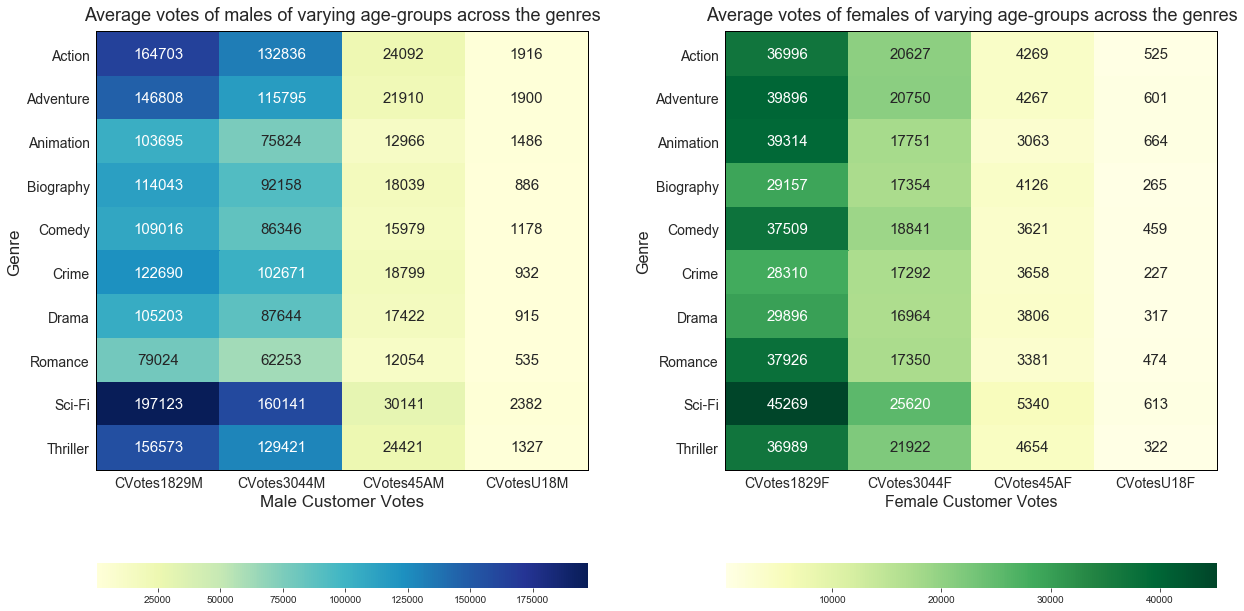

In [100]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=[19,12])
fig.tight_layout(pad=11.0)
sns.heatmap(tempM, cmap='YlGnBu', annot=True, fmt='d',cbar_kws={"orientation": "horizontal"},annot_kws={"fontsize":15},ax=ax1)
sns.heatmap(tempF, cmap='YlGn', annot=True, fmt='d',cbar_kws={"orientation": "horizontal"},annot_kws={"fontsize":15},ax=ax2)

ax1.set_title('Average votes of males of varying age-groups across the genres',fontsize=18, pad=12)
ax1.set_xlabel('Male Customer Votes',fontsize=17)
ax1.set_ylabel('Genre',fontsize=17)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)
ax1.patch.set_edgecolor('black')  
ax1.patch.set_linewidth('2')  

ax2.set_title('Average votes of females of varying age-groups across the genres',fontsize=18, pad=12)
ax2.set_xlabel('Female Customer Votes',fontsize=16)
ax2.set_ylabel('Genre',fontsize=16)
ax2.tick_params(axis="x", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)
ax2.patch.set_edgecolor('black')  
ax2.patch.set_linewidth('2')  
plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. 
- Inference 1: More no of voters belong to the age group of 18-29 irrespective of the gender.
- Inference 2: Romance seems to be most unpopular genre in all the agre groups in males while Crime seems to be the most unpopular among females in all the age groups.
- Inference 3: Sci-Fic remains msot popular in all the age groups irrespective of the gender.

In [101]:
# 2nd set of heat maps for Votes-related columns
tempM=pd.pivot_table(data=genre_top10,index=['Genre'],values=('VotesU18M','Votes1829M','Votes3044M','Votes45AM'),aggfunc=np.mean)
tempF=pd.pivot_table(data=genre_top10,index=['Genre'],values=('VotesU18F','Votes1829F','Votes3044F','Votes45AF'),aggfunc=np.mean)

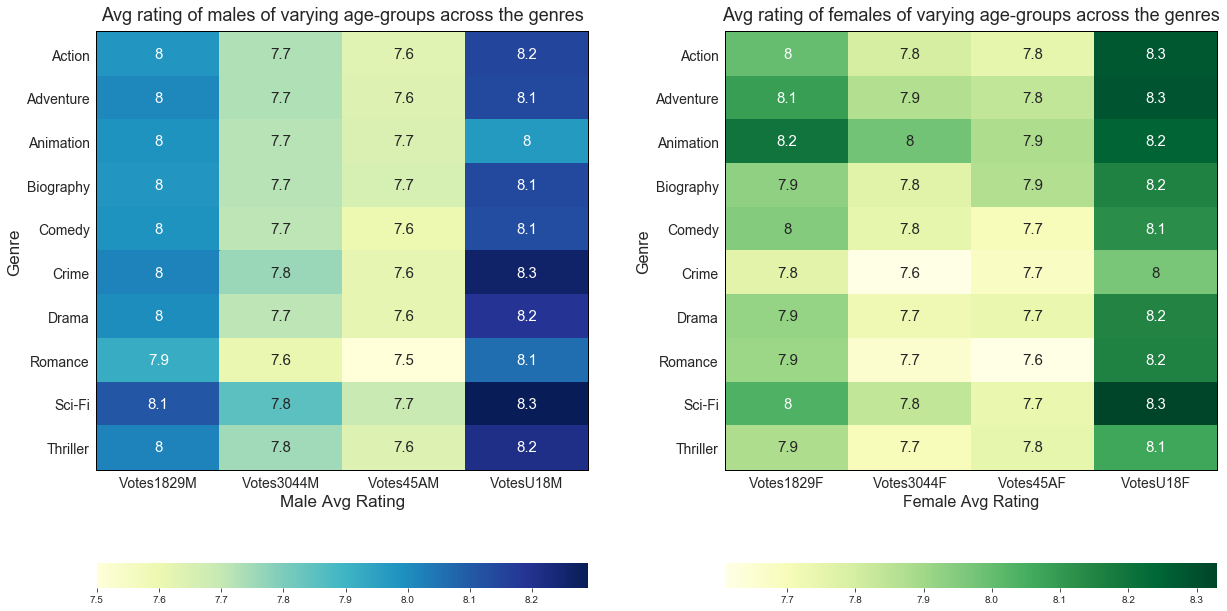

In [102]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=[19,12])
fig.tight_layout(pad=11.0)
sns.heatmap(tempM, cmap='YlGnBu', annot=True,cbar_kws={"orientation": "horizontal"},annot_kws={"fontsize":15},ax=ax1)
sns.heatmap(tempF, cmap='YlGn', annot=True,cbar_kws={"orientation": "horizontal"},annot_kws={"fontsize":15},ax=ax2)

ax1.set_title('Avg rating of males of varying age-groups across the genres',fontsize=18, pad=12)
ax1.set_xlabel('Male Avg Rating',fontsize=17)
ax1.set_ylabel('Genre',fontsize=17)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)
ax1.patch.set_edgecolor('black')  
ax1.patch.set_linewidth('2')  

ax2.set_title('Avg rating of females of varying age-groups across the genres',fontsize=18, pad=12)
ax2.set_xlabel('Female Avg Rating',fontsize=16)
ax2.set_ylabel('Genre',fontsize=16)
ax2.tick_params(axis="x", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)
ax2.patch.set_edgecolor('black')  
ax2.patch.set_linewidth('2')  
plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. 
- Inference 1: All the genres are rated mostly the same in the age group of 19-29 among Males.
- Inference 2:Romance is the most poorly rated genre in all the agre groups in males while Crime seems to be the poorly rated genre among females in all the age groups.
- Inference 3: Rating for all the genres seems to be comparitively high in the age group of 18-29 irrespective of the gender.

-  ###  US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

In [103]:
# Creating IFUS column
movies['IFUS']=movies.apply(lambda x: 'USA' if x.Country=='USA' else 'non-USA', axis=1)
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Avg_rating,FB_likes,IFUS
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,6.9,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905,7.50,138800.0,non-USA
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,8.8,Action,Adventure,Sci-Fi,7.4,148,584839,485218,304457,130972,46393,20595,10050,6631,5243,15365,1044318,239796,5678,4462,1184,655187,512411,136770,472680,392845,73555,79634,65508,12795,885,212524,707266,8.8,8.7,9.1,9.1,9.0,9.0,9.0,8.8,8.7,8.7,8.5,8.1,8.1,8.0,8.2,8.7,8.8,PG-13,USA,132.568851,8.10,79000.0,USA
14,X-Men: Days of Future Past,2014,200.0,233.914986,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,8.0,Action,Adventure,Sci-Fi,7.4,132,91765,127521,183578,104658,33027,10059,3710,1903,1225,3301,370835,71008,3038,2403,614,220178,179039,39094,158607,135392,20927,26834,22460,3884,710,67889,229049,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.2,7.8,7.8,8.0,7.7,7.7,7.9,7.4,8.1,7.9,PG-13,USA,33.914986,7.70,76000.0,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,9.6,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75,74818.0,USA
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,8.4,Action,Thriller,NaN,7.8,164,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642,8.10,73000.0,USA


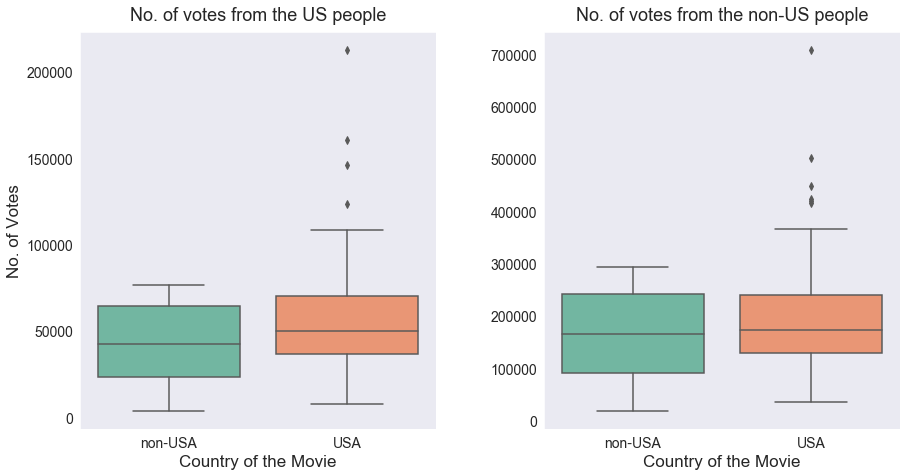

In [104]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=[14,8])
fig.tight_layout(pad=8.0)
sns.boxplot(x=movies['IFUS'], y=movies['CVotesUS'], ax=ax1, palette='Set2')
ax1.set_title('No. of votes from the US people',fontsize=18, pad=12)
ax1.set_xlabel('Country of the Movie',fontsize=17)
ax1.set_ylabel('No. of Votes',fontsize=17)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)

sns.boxplot(x=movies['IFUS'], y=movies['CVotesnUS'], ax=ax2, palette='Set2')
ax2.set_title('No. of votes from the non-US people',fontsize=18, pad=12)
ax2.set_xlabel('Country of the Movie',fontsize=17)
ax2.set_ylabel('',fontsize=17)
ax2.tick_params(axis="x", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)
plt.show()

**`Inferences:`** 
- Inference 1: For movies of USA, the US people have voted almost more than 50% votes of non-USA movies
- Inference 2: There are 25% more votes from the US people for USA movies than the hightest vote count for non_USA movies.
- Inference 3: Votes from non-USA people are fairly less for any country's movie than votes from US people. 

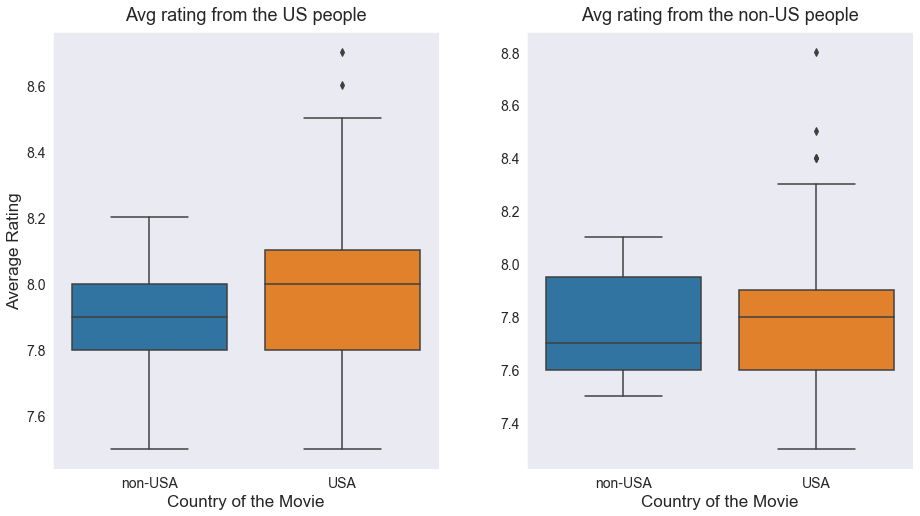

In [105]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=[14,8])
fig.tight_layout(pad=6.0)
sns.boxplot(x=movies['IFUS'], y=movies['VotesUS'], ax=ax1)
ax1.set_title('Avg rating from the US people',fontsize=18, pad=12)
ax1.set_xlabel('Country of the Movie',fontsize=17)
ax1.set_ylabel('Average Rating',fontsize=17)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)

sns.boxplot(x=movies['IFUS'], y=movies['VotesnUS'], ax=ax2)
ax2.set_title('Avg rating from the non-US people',fontsize=18, pad=12)
ax2.set_xlabel('Country of the Movie',fontsize=17)
ax2.set_ylabel('',fontsize=17)
ax2.tick_params(axis="x", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)
plt.show()

**`Inferences:`** 
- Inference 1: 50% of US movies have been rated more than 8 by US people while only 25% of non-USA movies are rated more than 8
- Inference 2: Non-USA movies have received comparitively higher rating than USA movies when rated by Non-US people

-  ### Top 1000 Voters Vs Genres

The column `CVotes1000` represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 



In [106]:
# Sorting by CVotes1000
genre_top10.sort_values(by='CVotes1000', ascending=False, inplace=True)
genre_top10

,Genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
8,Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,422437,83618,3017,2382,613,244808,197123,45269,188483,160141,25620,36127,30141,5340,714,80695,272068,7.96,7.96,8.29,8.29,8.33,8.11,8.11,8.04,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
0,Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,349581,67916,2460,1916,525,203684,164703,36996,155623,132836,20627,28862,24092,4269,681,69190,225998,7.85,7.92,8.19,8.15,8.28,7.99,7.98,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
9,Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,333785,68749,1664,1327,322,195463,156573,36989,153475,129421,21922,29590,24421,4654,669,63361,228944,7.87,7.82,8.21,8.21,8.07,8.01,8.02,7.88,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
1,Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,309468,71208,2520,1900,601,188563,146808,39896,138490,115795,20750,26641,21910,4267,662,61734,208034,7.85,8.01,8.19,8.14,8.29,8.02,8.01,8.09,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
5,Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,261935,53330,1169,932,227,152504,122690,28310,121645,102671,17292,22867,18799,3658,620,49928,181338,7.87,7.72,8.24,8.26,7.97,7.99,8.02,7.76,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
4,Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,227088,65142,1650,1178,459,148032,109016,37509,106680,86346,18841,19954,15979,3621,605,49220,165869,7.83,7.88,8.15,8.13,8.13,7.98,7.99,7.95,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
3,Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,240526,54827,1163,886,265,144627,114043,29157,111073,92158,17354,22550,18039,4126,600,45389,171004,7.84,7.88,8.16,8.14,8.16,7.97,7.98,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
6,Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,225671,54956,1243,915,317,136485,105203,29896,106122,87644,16964,21612,17422,3806,585,44164,161234,7.84,7.85,8.21,8.19,8.15,7.98,8.00,7.92,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
2,Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,207544,65894,2166,1486,664,144420,103695,39314,94853,75824,17751,16305,12966,3063,578,47673,150424,7.85,8.12,8.08,7.97,8.25,8.05,7.99,8.20,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
7,Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,162668,63572,1021,535,474,118201,79024,37926,80768,62253,17350,15719,12054,3381,548,37141,131254,7.75,7.83,8.14,8.06,8.16,7.92,7.92,7.91,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0


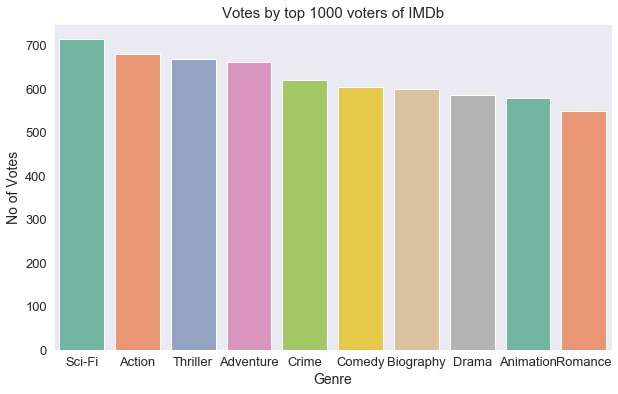

In [54]:
# Bar plot
plt.figure(figsize=[10,6])
sns.barplot(x=genre_top10['Genre'],y=genre_top10['CVotes1000'], palette='Set2')
plt.title('Votes by top 1000 voters of IMDb',fontsize=15)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('No of Votes',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

**`Inferences:`** 
- Inference 1: Sci-Fi appears to be the most popular among the top 1000 voters while Romance seems to be the msot unpopular.
- Inference 2: Action, Thriller and Adventure have a very minute differences in their popularity. All 3 can be stated as the second most popular among the 1000 top voters